In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import sklearn 
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from io import StringIO
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
#yi=traind.Age.values
#yi=yi.reshape(-1,1)
#imputer = KNNImputer(n_neighbors=5)
#ynew=imputer.fit_transform(yi)


In [13]:
traind=pd.read_csv('trainingdat.csv')
testd=pd.read_csv('testdat.csv')

In [14]:
traind=pd.read_csv('trainingdat.csv')[:-1];print(traind)

      ID        Date            Opponent Is_Home_or_Away  \
0    1.0    9/5/2015               Texas            Home   
1    2.0   9/12/2015            Virginia            Away   
2    3.0   9/19/2015         GeorgiaTech            Home   
3    4.0   9/26/2015               UMass            Home   
4    5.0   10/3/2015             Clemson            Away   
5    6.0  10/10/2015                Navy            Home   
6    7.0  10/17/2015                 USC            Home   
7    8.0  10/31/2015              Temple            Away   
8    9.0   11/7/2015                PITT            Away   
9   10.0  11/14/2015          WakeForest            Home   
10  11.0  11/21/2015       BostonCollege            Away   
11  12.0  11/28/2015            Stanford            Away   
12  13.0    9/4/2016               Texas            Away   
13  14.0   9/10/2016              Nevada            Home   
14  15.0   9/17/2016       MichiganState            Home   
15  16.0   9/24/2016                Duke

In [15]:
print(traind)

      ID        Date            Opponent Is_Home_or_Away  \
0    1.0    9/5/2015               Texas            Home   
1    2.0   9/12/2015            Virginia            Away   
2    3.0   9/19/2015         GeorgiaTech            Home   
3    4.0   9/26/2015               UMass            Home   
4    5.0   10/3/2015             Clemson            Away   
5    6.0  10/10/2015                Navy            Home   
6    7.0  10/17/2015                 USC            Home   
7    8.0  10/31/2015              Temple            Away   
8    9.0   11/7/2015                PITT            Away   
9   10.0  11/14/2015          WakeForest            Home   
10  11.0  11/21/2015       BostonCollege            Away   
11  12.0  11/28/2015            Stanford            Away   
12  13.0    9/4/2016               Texas            Away   
13  14.0   9/10/2016              Nevada            Home   
14  15.0   9/17/2016       MichiganState            Home   
15  16.0   9/24/2016                Duke

In [16]:
traind.Is_Opponent_in_AP25_Preseason = traind.Is_Opponent_in_AP25_Preseason.map( {'In': 1, 'Out': 0})
traind.Media = traind.Media.map( {'1-NBC':0, '2-ESPN':1, '3-FOX':2, '4-ABC': 3, '5-CBS': 4})
traind.Is_Home_or_Away = traind.Is_Home_or_Away.map( {'Home': 1, 'Away': 0})
traind.Label = traind.Label.map( {'Win': 1, 'Lose': 0})

X = traind[['Is_Home_or_Away','Media','Is_Opponent_in_AP25_Preseason']]
y = traind['Label']

                                                            

In [17]:
print(X,y)

    Is_Home_or_Away  Media  Is_Opponent_in_AP25_Preseason
0                 1      0                              0
1                 0      3                              0
2                 1      0                              1
3                 1      0                              0
4                 0      3                              1
5                 1      0                              0
6                 1      0                              1
7                 0      3                              0
8                 0      3                              0
9                 1      0                              0
10                0      0                              0
11                0      2                              1
12                0      3                              0
13                1      0                              0
14                1      0                              0
15                1      0                              0
16            

In [18]:

model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
y_pred = model.predict(X)
classification_report(y,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.80      0.70        10\n           1       0.82      0.64      0.72        14\n\n    accuracy                           0.71        24\n   macro avg       0.72      0.72      0.71        24\nweighted avg       0.73      0.71      0.71        24\n'

In [20]:
accuracy_score(y, y_pred)

0.7083333333333334

In [21]:
recall_score(y, y_pred)

0.6428571428571429

In [22]:
precision_score(y, y_pred)

0.8181818181818182

In [23]:
f1_score(y, y_pred)

0.7200000000000001

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred1 = neigh.predict(X)

In [25]:
accuracy_score(y, y_pred1)

0.7083333333333334

In [26]:
recall_score(y, y_pred1)

1.0

In [27]:
precision_score(y, y_pred1)

0.6666666666666666

In [28]:
f1_score(y, y_pred1)

0.8

In [29]:
y_pred1

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [30]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [31]:
testd.Is_Opponent_in_AP25_Preseason = testd.Is_Opponent_in_AP25_Preseason.map( {'In': 1, 'Out': 0})
testd.Media = testd.Media.map( {'1-NBC':0, '2-ESPN':1, '3-FOX':2, '4-ABC': 3, '5-CBS': 4})
testd.Is_Home_or_Away = testd.Is_Home_or_Away.map( {'Home': 1, 'Away': 0})
testd.Label = testd.Label.map( {'Win': 1, 'Lose': 0})

X1 = testd[['Is_Home_or_Away','Media','Is_Opponent_in_AP25_Preseason']]
y1 = testd['Label']
print(X1,y1)

    Is_Home_or_Away  Media  Is_Opponent_in_AP25_Preseason
0                 1      0                              0
1                 1      0                              1
2                 0      1                              0
3                 0      2                              0
4                 1      0                              0
5                 0      3                              0
6                 1      0                              1
7                 1      0                              0
8                 1      0                              0
9                 0      3                              1
10                1      0                              0
11                0      3                              1 0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    0
Name: Label, dtype: int64


In [32]:
modelt = GaussianNB()
modelt.fit(X1, y1); 
y_pred2 = model.predict(X1)


In [33]:
accuracy_score(y1, y_pred2)

0.8333333333333334

In [34]:
recall_score(y1, y_pred2)

0.7777777777777778

In [35]:
precision_score(y1, y_pred2)

1.0

In [36]:
f1_score(y1, y_pred2)

0.8750000000000001

In [37]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X1, y1)
y_pred3 = neigh.predict(X1)

In [38]:
accuracy_score(y1, y_pred3)

0.9166666666666666

In [39]:
recall_score(y1, y_pred3)

1.0

In [40]:
precision_score(y1, y_pred3)

0.9

In [41]:
f1_score(y1, y_pred3)

0.9473684210526316

In [42]:
y_pred2

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [43]:
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [44]:
for x,y,z in zip(y1.values,y_pred2,y_pred3):
    print(x,y,z)

1 1 1
0 0 1
1 1 1
1 1 1
1 1 1
1 0 1
1 0 1
1 1 1
1 1 1
0 0 0
1 1 1
0 0 0


In [45]:
# Out of personal interest and learning I have calculated Opponent as well

In [46]:
traind.Opponent.nunique()
traind.Opponent

0                  Texas
1               Virginia
2            GeorgiaTech
3                  UMass
4                Clemson
5                   Navy
6                    USC
7                 Temple
8                   PITT
9             WakeForest
10         BostonCollege
11              Stanford
12                 Texas
13                Nevada
14         MichiganState
15                  Duke
16              Syracuse
17    NorthCarolinaState
18              Stanford
19          MiamiFlorida
20                  Navy
21                  Army
22          VirginiaTech
23                   USC
Name: Opponent, dtype: object

In [47]:
for i in traind.Opponent:
    print(i)
    

Texas
Virginia
GeorgiaTech
UMass
Clemson
Navy
USC
Temple
PITT
WakeForest
BostonCollege
Stanford
Texas
Nevada
MichiganState
Duke
Syracuse
NorthCarolinaState
Stanford
MiamiFlorida
Navy
Army
VirginiaTech
USC


In [48]:
traind.Opponent = traind.Opponent.map( {'Texas':0, 'Virginia':1, 'GeorgiaTech':2, 'UMass': 3, 'Clemson': 4,'Navy':5, 'USC':6, 'Temple':7, 'PITT': 8, 'WakeForest': 9,'BostonCollege':10, 'Stanford': 11, 'Nevada': 12,'MichiganState':13, 'Duke':14, 'Syracuse':15, 'NorthCarolinaState': 16, 'MiamiFlorida': 17,'Army': 18,'VirginiaTech':19})

In [49]:
traind.Opponent

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12     0
13    12
14    13
15    14
16    15
17    16
18    11
19    17
20     5
21    18
22    19
23     6
Name: Opponent, dtype: int64

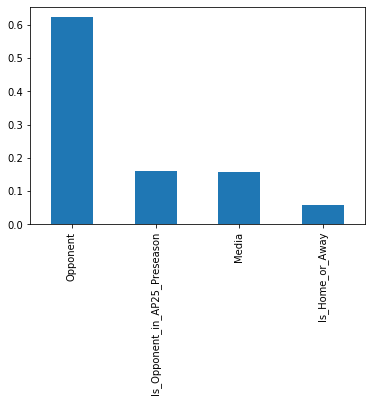

In [50]:
X2 = traind[['Is_Home_or_Away','Media','Is_Opponent_in_AP25_Preseason','Opponent']]
y2 = traind['Label']
ex = ExtraTreesClassifier()
ex.fit(X2, y2)
feat_importances = pd.Series(ex.feature_importances_, index=X2.columns)
feat_importances.nlargest(4).plot(kind='bar')
plt.show()

In [51]:
traind.Opponent.value_counts()

0     2
5     2
6     2
11    2
8     1
1     1
2     1
3     1
4     1
7     1
19    1
18    1
10    1
12    1
13    1
14    1
15    1
16    1
17    1
9     1
Name: Opponent, dtype: int64

In [52]:
traind.Media.value_counts()

0    14
3     7
4     1
2     1
1     1
Name: Media, dtype: int64

In [53]:
#i am considering opponent as well. I am leaving out is home or away

In [54]:
model4 = GaussianNB()
model4.fit(X2, y2); 


In [55]:
y_pred5 = model4.predict(X2)



In [56]:
accuracy_score(y2, y_pred5)

0.7083333333333334

In [57]:
recall_score(y2, y_pred5)

0.6428571428571429

In [58]:
precision_score(y2, y_pred5)

0.8181818181818182

In [59]:
f1_score(y2, y_pred5)

0.7200000000000001

In [60]:
x6 = traind[['Opponent','Media','Is_Opponent_in_AP25_Preseason']]
y6 = traind['Label']
print(x6,y6)

    Opponent  Media  Is_Opponent_in_AP25_Preseason
0          0      0                              0
1          1      3                              0
2          2      0                              1
3          3      0                              0
4          4      3                              1
5          5      0                              0
6          6      0                              1
7          7      3                              0
8          8      3                              0
9          9      0                              0
10        10      0                              0
11        11      2                              1
12         0      3                              0
13        12      0                              0
14        13      0                              0
15        14      0                              0
16        15      1                              0
17        16      3                              0
18        11      0            

In [61]:
model6 = GaussianNB()
model6.fit(x6, y6); 
y_pred6 = model6.predict(x6)

In [62]:
accuracy_score(y6, y_pred6)

0.75

In [63]:
recall_score(y6, y_pred6)

0.7857142857142857

In [64]:
precision_score(y6, y_pred6)

0.7857142857142857

In [65]:
f1_score(y6, y_pred6)

0.7857142857142857

In [66]:
#testd.Opponent

In [67]:
testd.Opponent

0                 Temple
1                Georgia
2          BostonCollege
3          MichiganState
4              MiamiOhio
5          NorthCarolina
6                    USC
7     NorthCarolinaState
8             WakeForest
9           MiamiFlorida
10                  Navy
11              Stanford
Name: Opponent, dtype: object

In [68]:
testd.Opponent = testd.Opponent.map( {'Texas':0, 'Virginia':1, 'GeorgiaTech':2, 'UMass': 3, 'Clemson': 4,'Navy':5, 'USC':6, 'Temple':7, 'PITT': 8, 'WakeForest': 9,'BostonCollege':10, 'Stanford': 11, 'Nevada': 12,'MichiganState':13, 'Duke':14, 'Syracuse':15, 'NorthCarolinaState': 16, 'MiamiFlorida': 17,'Army': 18,'VirginiaTech':19,'Georgia':20,'NorthCarolina':21,'MiamiOhio':22})

In [69]:
testd.Opponent

0      7
1     20
2     10
3     13
4     22
5     21
6      6
7     16
8      9
9     17
10     5
11    11
Name: Opponent, dtype: int64

In [70]:
x7 = testd[['Opponent','Media','Is_Opponent_in_AP25_Preseason']]
y7 = testd['Label']
print(x7,y7)

    Opponent  Media  Is_Opponent_in_AP25_Preseason
0          7      0                              0
1         20      0                              1
2         10      1                              0
3         13      2                              0
4         22      0                              0
5         21      3                              0
6          6      0                              1
7         16      0                              0
8          9      0                              0
9         17      3                              1
10         5      0                              0
11        11      3                              1 0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    0
Name: Label, dtype: int64


In [71]:
model7 = GaussianNB()
model7.fit(x7, y7); 
y_pred7 = model7.predict(x7)

In [72]:
accuracy_score(y7, y_pred7)

0.9166666666666666

In [73]:
recall_score(y7, y_pred7)

0.8888888888888888

In [74]:
precision_score(y7, y_pred7)

1.0

In [75]:
f1_score(y7, y_pred7)

0.9411764705882353

In [76]:
neigh6 = KNeighborsClassifier(n_neighbors=3)
neigh6.fit(x6, y6)
y_pred8 = neigh6.predict(x6)

In [77]:
accuracy_score(y6, y_pred8)

0.75

In [78]:
recall_score(y6, y_pred8)

0.8571428571428571

In [79]:
precision_score(y6, y_pred8)

0.75

In [80]:
f1_score(y6, y_pred8)

0.7999999999999999

In [81]:
neigh7 = KNeighborsClassifier(n_neighbors=3)
neigh7.fit(x7, y7)
y_pred9 = neigh7.predict(x7)

In [82]:
accuracy_score(y7, y_pred9)

0.75

In [83]:
recall_score(y7, y_pred9)

1.0

In [84]:
precision_score(y7, y_pred9)

0.75

In [85]:
f1_score(y7, y_pred9)

0.8571428571428571

In [86]:
for x,y,z in zip(y1.values,y_pred7,y_pred9):
    print(x,y,z)

1 1 1
0 0 1
1 1 1
1 1 1
1 1 1
1 1 1
1 0 1
1 1 1
1 1 1
0 0 1
1 1 1
0 0 1
